## HW

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%pip install tensorflow

     -------------------------------------- 444.1/444.1 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 6.9 MB/s eta 0:00:00
     -------------------------------------- 123.4/123.4 kB 7.5 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 10.3 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 6.0 MB/s eta 0:00:00
     -------------------------------------- 895.7/895.7 kB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 8.0 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 8.6 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata

In [5]:
import tensorflow as tf
data = tf.keras.datasets.fashion_mnist.load_data()

(train_data, train_target), (test_data, test_target)

0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [9]:
train, test = data
train_data, train_target = train
test_data, test_target = test

In [23]:
train_target

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### 이미지 보기

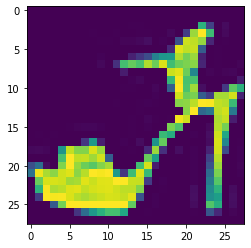

In [19]:
plt.imshow(train_data[9])
plt.show()

In [41]:
train_target.shape

(60000,)

In [42]:
train_data = train_data.reshape(60000,28*28)

In [47]:
test_data = test_data.reshape(10000,28*28)

### 데이터가 너무 많아서 일부만 추출

In [57]:
from sklearn.model_selection import train_test_split
train_, sample_data, target_, sample_target = train_test_split(train_data, train_target, test_size=0.2, stratify=train_target)

In [58]:
print(sample_data.shape )
print(sample_target.shape)

(12000, 784)
(12000,)


### 표준화

In [59]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit(sample_data)
st.fit(test_data)
st.transform(sample_data)
st.transform(test_data)

array([[-0.01341762, -0.02066217, -0.02378436, ..., -0.16669942,
        -0.09439763, -0.03503079],
       [-0.01341762, -0.02066217, -0.02378436, ..., -0.16669942,
        -0.09439763, -0.03503079],
       [-0.01341762, -0.02066217, -0.02378436, ..., -0.16669942,
        -0.09439763, -0.03503079],
       ...,
       [-0.01341762, -0.02066217, -0.02378436, ..., -0.16669942,
        -0.09439763, -0.03503079],
       [-0.01341762, -0.02066217, -0.02378436, ..., -0.16669942,
        -0.09439763, -0.03503079],
       [-0.01341762, -0.02066217, -0.02378436, ..., -0.16669942,
        -0.09439763, -0.03503079]])

In [60]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=3000)
lg.fit(sample_data, sample_target)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=3000)

In [62]:
print(lg.score(sample_data, sample_target))
print(lg.score(test_data, test_target))


0.9713333333333334
0.7695


### 교차검증


In [63]:
from sklearn.model_selection import cross_validate
result = cross_validate(lg, sample_data, sample_target, return_train_score=True)
result

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

{'fit_time': array([100.89034367, 100.64123869, 119.09956932, 104.48091197,
        106.08264375]),
 'score_time': array([0.01007843, 0.00955343, 0.00889182, 0.01064515, 0.00897741]),
 'test_score': array([0.7675    , 0.75791667, 0.7575    , 0.78041667, 0.77583333]),
 'train_score': array([0.99770833, 0.99989583, 1.        , 0.995     , 0.99677083])}

In [66]:
print(np.mean(result['train_score']))
print(np.mean(result['test_score']))
print(np.mean(result['fit_time']))

0.997875
0.7678333333333333
106.23894147872925


### 그리드서치

In [67]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
params = {'penalty': ['l1','l2','elasticnet'], 'solver' :['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lg = LogisticRegression()
grid_lg = GridSearchCV(lg, param_grid=params, cv=3, refit=True)
grid_lg.fit(sample_data, sample_target)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [70]:
print('best parameters : ', grid_lg.best_params_)
print('best score : ', grid_lg.best_score_)
em = grid_lg.best_estimator_
print(em)

best parameters :  {'penalty': 'l2', 'solver': 'saga'}
best score :  0.8308333333333332
LogisticRegression(solver='saga')


In [74]:
grid_lg.cv_results_

{'mean_fit_time': array([3.11787923e-03, 2.91951497e-03, 3.50415783e+02, 5.26340803e-03,
        1.22568994e+02, 2.40678977e+02, 2.77508179e+00, 7.88571083e+02,
        3.24095740e+01, 3.81041765e+01, 2.99040476e-03, 2.84218788e-03,
        2.98078855e-03, 2.98094749e-03, 2.62355804e-03]),
 'std_fit_time': array([1.78647741e-04, 8.21531897e-04, 2.50057738e+01, 7.44358301e-03,
        1.24459932e+00, 8.14164084e+00, 7.33480965e-02, 6.57972060e+02,
        7.74242817e-01, 1.51181036e-01, 7.91718433e-04, 6.14575982e-04,
        1.37462779e-05, 2.78456842e-05, 4.68193510e-04]),
 'mean_score_time': array([0.        , 0.        , 0.01539191, 0.        , 0.01363945,
        0.0262897 , 0.0201052 , 0.01927932, 0.01466544, 0.0133098 ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'std_score_time': array([0.        , 0.        , 0.00137792, 0.        , 0.00124593,
        0.00392452, 0.00390855, 0.00459994, 0.0004962 , 0.00092459,
        0.        , 0.        , 0.      

In [75]:
print(grid_lg.cv_results_['mean_test_score'])

[       nan        nan 0.78183333        nan 0.83041667 0.76291667
 0.82991667 0.77833333 0.82391667 0.83083333        nan        nan
        nan        nan        nan]


# 결론
|estimator|train|test|
|------|---|---|
|LogisticRegression|0.9713|0.7695|
|LogisticRegression(교차)|0.9979|0.7678|
|*LogisticRegression(solver='saga')||0.8308|

* 마지막 줄은 그리드 서치 돌렸을 때 베스트 하이퍼파라미터